# Binary Classification of Text Data (Twitter API) using SVM

This tab will explore the performance of SVM Kernels on my cleaned text data, which was gathered using the Twitter API. My sentiment analysis on the text data yielded an average sentiment of 0.04, which is neither positive or negative. This means that our data is not imbalanced and can be used for analysis. 

### Methods

The first step of our SVM modelling is to test our data on a random classifier, which is a baseline model. The random classifier will output precision, accuracy, and recall values.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import warnings
import os
warnings.filterwarnings('always')

### Load the cleaned data

In [9]:
tweets_news_clean = pd.read_csv("../../data/clean-data/news_clean.csv")

In [10]:
tweets_news_clean

,Unnamed: 0,Content_Lemmatized_Sentiment_Analysis,sentiment_rating,label
0,0,riyadh oct reuters global recession avoided go...,-0.8225,Negative
1,1,melbourne sept reuters oil price dipped early ...,-0.6249,Negative
2,2,posted bank england raised key interest rate t...,0.4588,Positive
3,3,washington sept reuters downside risk continue...,-0.7506,Negative
4,4,london sept reuters sterling surrendered gain ...,0.7506,Positive
...,...,...,...,...
451,451,though briefly dipped early august average yea...,0.2732,Positive
452,452,u treasury secretary janet yellen said hopeful...,0.9337,Positive
453,453,likely u inflation start cool soon imbalance l...,0.7430,Positive
454,454,china yuan weakened lowest level since july th...,-0.3182,Negative


In [11]:
tweets_news_clean.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [12]:
tweets_news_clean

,Content_Lemmatized_Sentiment_Analysis,sentiment_rating,label
0,riyadh oct reuters global recession avoided go...,-0.8225,Negative
1,melbourne sept reuters oil price dipped early ...,-0.6249,Negative
2,posted bank england raised key interest rate t...,0.4588,Positive
3,washington sept reuters downside risk continue...,-0.7506,Negative
4,london sept reuters sterling surrendered gain ...,0.7506,Positive
...,...,...,...
451,though briefly dipped early august average yea...,0.2732,Positive
452,u treasury secretary janet yellen said hopeful...,0.9337,Positive
453,likely u inflation start cool soon imbalance l...,0.7430,Positive
454,china yuan weakened lowest level since july th...,-0.3182,Negative


In [32]:
tweets_news_clean['sentiment_rating'].mean()

0.036431359649122745

In [14]:
print("The data shape is ", tweets_news_clean.shape)

The data shape is  (456, 3)


### Split into training and testing
Our dependent variable is the sentiment score, and the independent variable is the words from the cleaned tweets. 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
np.random.seed(3737)

X = tweets_news_clean["Content_Lemmatized_Sentiment_Analysis"]

y = tweets_news_clean["label"]

x_train, x_test, y_train, y_test = train_test_split(X, y, 
    random_state = 1,test_size=0.2
)

count_vector = CountVectorizer()

training_data = count_vector.fit_transform(x_train)
testing_data = count_vector.transform(x_test)

In [16]:
print("Shape of x_train is: ", x_train.shape)
print("Shape of x_test is: ",x_test.shape)
print("Shape of y_train is: ",y_train.shape)
print("Shape of y_test is: ",y_test.shape)
print("The levels of the dependent variable (Sentiment) are:")
print(y.value_counts())

Shape of x_train is:  (364,)
Shape of x_test is:  (92,)
Shape of y_train is:  (364,)
Shape of y_test is:  (92,)
The levels of the dependent variable (Sentiment) are:
Positive    274
Negative    182
Name: label, dtype: int64


In [17]:
import numpy as np
import random
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support



In [21]:
def random_classifier(y_data):
    ypred=[]
    max_label=np.max(y_data); #print(max_label)
    for i in range(0,len(y_data)):
        ypred.append(int(np.floor((max_label+1)*np.random.uniform(0,1))))

    print("\n\n-----RANDOM CLASSIFIER-----")
    print("count of prediction:",Counter(ypred).values()) 
    print("probability of prediction:",np.fromiter(Counter(ypred).values(), dtype=float)/len(y_data)) 
    print("accuracy",accuracy_score(y_data, ypred))
    print("precision, recall, fscore, support",precision_recall_fscore_support(y_data, ypred))



In [22]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
y_encoded = label_encoder.fit_transform(y)
  
print("\nBINARY CLASS: NON-UNIFORM LOAD (Positive: 175 count, Negative: 205 count")

print("Unique labels and respective counts after one-hot encoding: ")

print("0 = Negative and 1 = Positive")

unique, counts = np.unique(y_encoded, return_counts=True)

print(np.asarray((unique, counts)).T)

random_classifier(y_encoded)


BINARY CLASS: NON-UNIFORM LOAD (Positive: 175 count, Negative: 205 count
Unique labels and respective counts after one-hot encoding: 
0 = Negative and 1 = Positive
[[  0 182]
 [  1 274]]


-----RANDOM CLASSIFIER-----
count of prediction: dict_values([243, 213])
probability of prediction: [0.53289474 0.46710526]
accuracy 0.5109649122807017
precision, recall, fscore, support (array([0.41563786, 0.61971831]), array([0.55494505, 0.48175182]), array([0.47529412, 0.54209446]), array([182, 274]))


Here, we see that the baseline classifier yields an accuracy of 51% and an f-1 score of 0.475 for positive values and 0.542 for negative values. Now, we explore the SVM linear kernel.

In [23]:
from sklearn.svm import SVC
clf = SVC(C=0.45, kernel='linear')
clf.fit(training_data, y_train)

yp_train = clf.predict(training_data)
yp_test = clf.predict(testing_data)

In [24]:
cm_train = confusion_matrix(y_train, yp_train, labels=clf.classes_) # calculate confusion matrix
cm_test = confusion_matrix(y_test, yp_test, labels=clf.classes_)

target_names = ['Positive', 'Negative']
clf_report_train_linear = classification_report(y_train, yp_train, target_names=target_names, output_dict=True)
clf_report_test_linear = classification_report(y_test, yp_test, target_names=target_names, output_dict=True)

In [25]:
clf_report_train_linear = pd.DataFrame(clf_report_train_linear).transpose()
clf_report_test_linear = pd.DataFrame(clf_report_test_linear).transpose()

In [26]:
print("Classification Report of Linear SVM Train Data:")
clf_report_train_linear

Classification Report of Linear SVM Train Data:


,precision,recall,f1-score,support
Positive,1.0,1.0,1.0,148.0
Negative,1.0,1.0,1.0,216.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,364.0
weighted avg,1.0,1.0,1.0,364.0


In [27]:
print("Classification Report of Linear SVM Test Data:")
clf_report_test_linear

Classification Report of Linear SVM Test Data:


,precision,recall,f1-score,support
Positive,0.750000,0.705882,0.727273,34.000000
Negative,0.833333,0.862069,0.847458,58.000000
accuracy,0.804348,0.804348,0.804348,0.804348
macro avg,0.791667,0.783976,0.787365,92.000000
weighted avg,0.802536,0.804348,0.803041,92.000000


Text(0.5, 1.0, 'Confusion Matrix: Linear SVM Test Data')

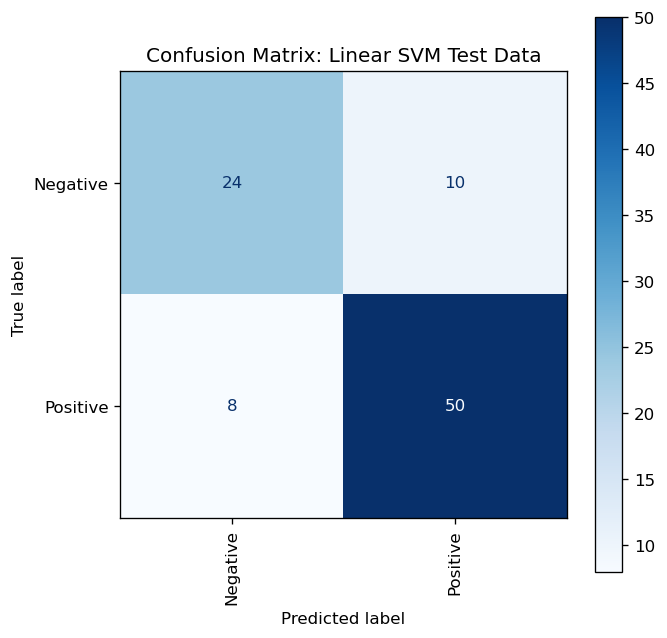

In [28]:
# Display Confusion Matrix for the test data
fig, ax = plt.subplots(figsize=(6,6), dpi=120)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=clf.classes_)
disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='d', xticks_rotation='vertical')
plt.title("Confusion Matrix: Linear SVM Test Data")

In [29]:
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV  
  
# defining parameter range
param_grid = {'C': [0.1, 0.3, 0.7, 1, 5, 10], 
              'kernel': ['linear']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = -1)

grid.fit(training_data, y_train)

# print best parameter after tuning
print("The best parameters after tuning are: ", grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print("The best model after tuning looks like: ",grid.best_estimator_)

grid_predictions = grid.predict(testing_data)

# print classification report
print(classification_report(y_test, grid_predictions))

The best parameters after tuning are:  {'C': 0.3, 'kernel': 'linear'}
The best model after tuning looks like:  SVC(C=0.3, kernel='linear')
              precision    recall  f1-score   support

    Negative       0.75      0.71      0.73        34
    Positive       0.83      0.86      0.85        58

    accuracy                           0.80        92
   macro avg       0.79      0.78      0.79        92
weighted avg       0.80      0.80      0.80        92



Text(0.5, 1.0, 'GridSearchCV Confusion Matrix: Linear SVM Test Data')

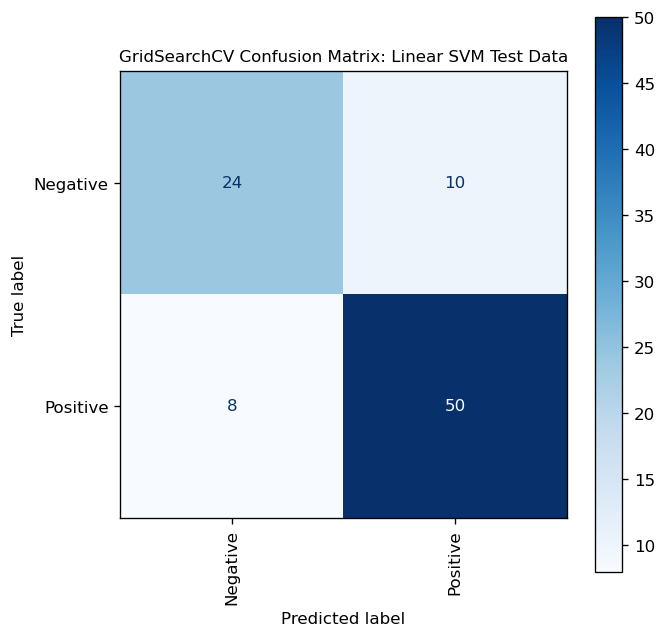

In [30]:
# Display Confusion Matrix for the above hyperparameter model.
cm_test = confusion_matrix(y_test, grid_predictions, labels=grid.classes_)
fig, ax = plt.subplots(figsize=(6,6), dpi=120)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=clf.classes_)
disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='d', xticks_rotation='vertical')
title_font = {'size':'10'}
plt.title("GridSearchCV Confusion Matrix: Linear SVM Test Data", **title_font)

After performing hyperparameter tuning, we see that the performance of the SVM Linear Kernel remains unchanged. This shows that we had initially chosen the best model before performing hyperparameter turning.